# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting the dataset

#### Only need to run this once so uncomment/comment accordingly

In [15]:
### Images + Labels through (DNN) ###

#fname = "kay_labels.npy"
#if not os.path.exists(fname):
#  !wget -qO $fname https://osf.io/r638s/download

### Original Dataset ###

#fname = "kay_images.npz"
#if not os.path.exists(fname):
#  !wget -qO $fname https://osf.io/ymnjv/download

# Load Dataset and check dimensions

In [2]:
### Load images + fMRI responses ###
with np.load('dataset/kay_images.npz') as dobj:
    data = dict(**dobj)

### Exploring keys in dataset ###
for k,v in data.items(): 
    print(k,'has shape',v.shape)
print(data["roi_names"])

stimuli has shape (1750, 128, 128)
stimuli_test has shape (120, 128, 128)
responses has shape (1750, 8428)
responses_test has shape (120, 8428)
roi has shape (8428,)
roi_names has shape (8,)
['Other' 'V1' 'V2' 'V3' 'V3A' 'V3B' 'V4' 'LatOcc']


### Dimensions of dictionary values ###
- 1750 **Training Images**, each is 128 by 128 pixels
- 120 **Test Images**, each is 128 by 128 pixels
- 1750 **fMRI responses** for the training images, each is 8428
- 120 **fMRI responses** for the test images, each is 8428
- 8428 **rois** from the visual cortex corresponding to the 8428 fMRI responses
- 7 **Names** corresponding to the Visual cortex regions of interest

# Which roi in the visual cortex gave the most responses?

([<matplotlib.axis.XTick at 0x7f323155cf28>,
 [Text(0, 0, 'V1'),
  Text(0, 0, 'V2'),
  Text(0, 0, 'V3'),
  Text(0, 0, 'V3A'),
  Text(0, 0, 'V3B'),
  Text(0, 0, 'V4'),
  Text(0, 0, 'LatOcc')])

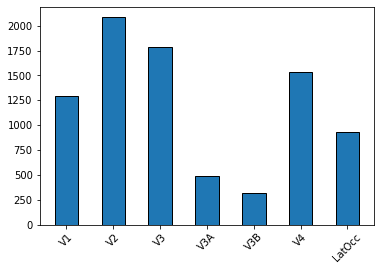

In [4]:
plt.hist(data["roi"],bins=[1,2,3,4,5,6,7,8],histtype='bar',ec='black',rwidth=0.5,align='left')
plt.xticks(range(1,8),data["roi_names"][1:],rotation=45)

# Restructure the images w.r.t ROI

In [5]:
responses = pd.DataFrame(data["responses"], index=np.arange(0,1750), columns=data["roi"]) 

In [19]:
responses

,3,3,3,3,3,3,3,3,3,3,...,4,4,4,3,3,4,4,3,3,6
0,0.531093,-0.171167,-2.181853,-0.590274,0.245196,0.059644,-0.058265,-0.601771,-0.691502,-0.177053,...,0.955176,-1.139927,-1.109647,0.053570,0.134723,-1.035699,-0.505569,-0.080873,-0.071814,-1.146884
1,-0.379516,-1.579139,-1.524006,0.096045,1.685208,0.847504,-0.040209,-1.125981,0.806234,1.361270,...,-0.787040,-0.815515,0.978414,2.116331,1.461600,-0.255562,-0.556305,-0.113045,-1.717300,1.176624
2,0.993240,1.119816,1.243125,1.473681,-1.125020,0.783543,0.588116,0.706639,0.817972,-0.921178,...,-0.946324,-0.869877,0.072738,-0.487968,-1.162385,-0.867700,-0.251304,-0.110324,-1.386031,-0.242594
3,1.756514,0.699765,-0.388143,0.150458,0.705467,0.428681,0.030642,0.101369,-0.739247,-0.702940,...,0.548245,0.419803,-0.011692,0.105247,-0.350751,-0.914126,0.453623,0.253758,-0.671005,1.596471
4,0.842771,1.387936,0.007925,-0.842458,-1.989295,0.298848,-0.021444,-0.184654,-0.730680,-0.171392,...,0.333085,0.238097,0.650603,0.037778,-1.581843,-0.433246,0.509865,-0.806264,-0.119285,0.018651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,2.382426,-2.107147,-1.493594,1.388827,-2.631801,0.420308,1.683057,-0.186406,-1.323717,-0.028985,...,-0.052304,-0.114748,0.077722,-0.142346,0.153296,0.577898,-0.753325,-0.022726,-1.190211,0.762595
1746,0.254708,0.231810,0.583201,0.146587,2.864857,1.392254,0.034607,0.225181,-0.564796,0.974519,...,0.123246,2.308055,-1.613054,0.521945,-0.896805,0.200033,-1.183683,1.196666,0.980932,-0.219608
1747,0.079429,-0.866007,-1.408018,-0.853197,-0.252877,0.042183,-0.415159,-0.141462,-0.962654,-0.593978,...,-0.006753,0.474039,0.391124,0.069396,-0.843283,0.812464,0.067151,-0.970908,-0.422587,1.593691
1748,0.184899,-0.062512,0.003561,0.265541,0.659230,0.249730,0.964624,0.081428,0.180992,1.352235,...,2.021719,0.622491,0.034783,1.032075,1.384395,0.464786,-0.251093,1.312982,0.767961,0.302888


In [20]:
responses.describe()

,3,3,3,3,3,3,3,3,3,3,...,4,4,4,3,3,4,4,3,3,6
count,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,...,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03
mean,5.684342e-17,3.248195e-17,2.030122e-17,-9.237056e-17,1.329730e-16,-2.030122e-17,-3.613617e-16,2.233134e-17,-4.060244e-18,1.136868e-16,...,-6.090366e-18,6.902415e-17,6.902415e-17,5.887354e-17,-4.060244e-18,1.218073e-17,-4.060244e-18,8.120488e-17,2.030122e-17,-2.233134e-17
std,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,...,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01,9.988558e-01
min,-2.955764e+00,-3.123847e+00,-4.005114e+00,-4.657035e+00,-3.435562e+00,-3.159415e+00,-3.592281e+00,-2.958022e+00,-3.166441e+00,-3.605199e+00,...,-3.217396e+00,-3.383268e+00,-3.606972e+00,-4.360939e+00,-3.024111e+00,-3.296819e+00,-3.399048e+00,-3.102076e+00,-3.378755e+00,-3.364609e+00
25%,-7.119340e-01,-6.685663e-01,-6.694349e-01,-6.329707e-01,-6.805485e-01,-6.611216e-01,-6.582710e-01,-6.669115e-01,-6.860699e-01,-6.207489e-01,...,-6.452450e-01,-6.618149e-01,-6.775924e-01,-6.626533e-01,-6.666158e-01,-6.412317e-01,-6.644702e-01,-6.809349e-01,-6.236080e-01,-6.772664e-01
50%,-5.091577e-03,1.381535e-02,-3.224040e-03,6.437238e-02,-3.641973e-03,-2.237086e-03,1.223542e-02,-1.814966e-02,-8.414766e-03,-2.896502e-02,...,1.163607e-02,1.572866e-02,-5.064260e-02,-2.020065e-04,2.575588e-03,-3.702897e-03,-8.736131e-03,1.774496e-02,-9.832898e-04,-5.388238e-02
75%,6.673778e-01,6.143895e-01,6.678966e-01,6.492662e-01,6.670811e-01,6.821618e-01,6.672284e-01,6.469187e-01,6.800614e-01,6.309350e-01,...,6.828378e-01,6.913081e-01,6.908327e-01,6.528493e-01,6.330343e-01,6.481881e-01,6.326657e-01,6.651992e-01,6.636623e-01,6.728389e-01
max,3.735049e+00,3.071154e+00,3.230361e+00,3.132681e+00,3.641259e+00,3.668577e+00,3.510164e+00,4.279382e+00,3.278086e+00,3.145884e+00,...,3.480267e+00,3.044964e+00,3.982167e+00,3.196127e+00,4.677676e+00,3.506839e+00,3.503676e+00,3.000183e+00,3.899237e+00,3.533329e+00


# Average response per ROI across ALL images

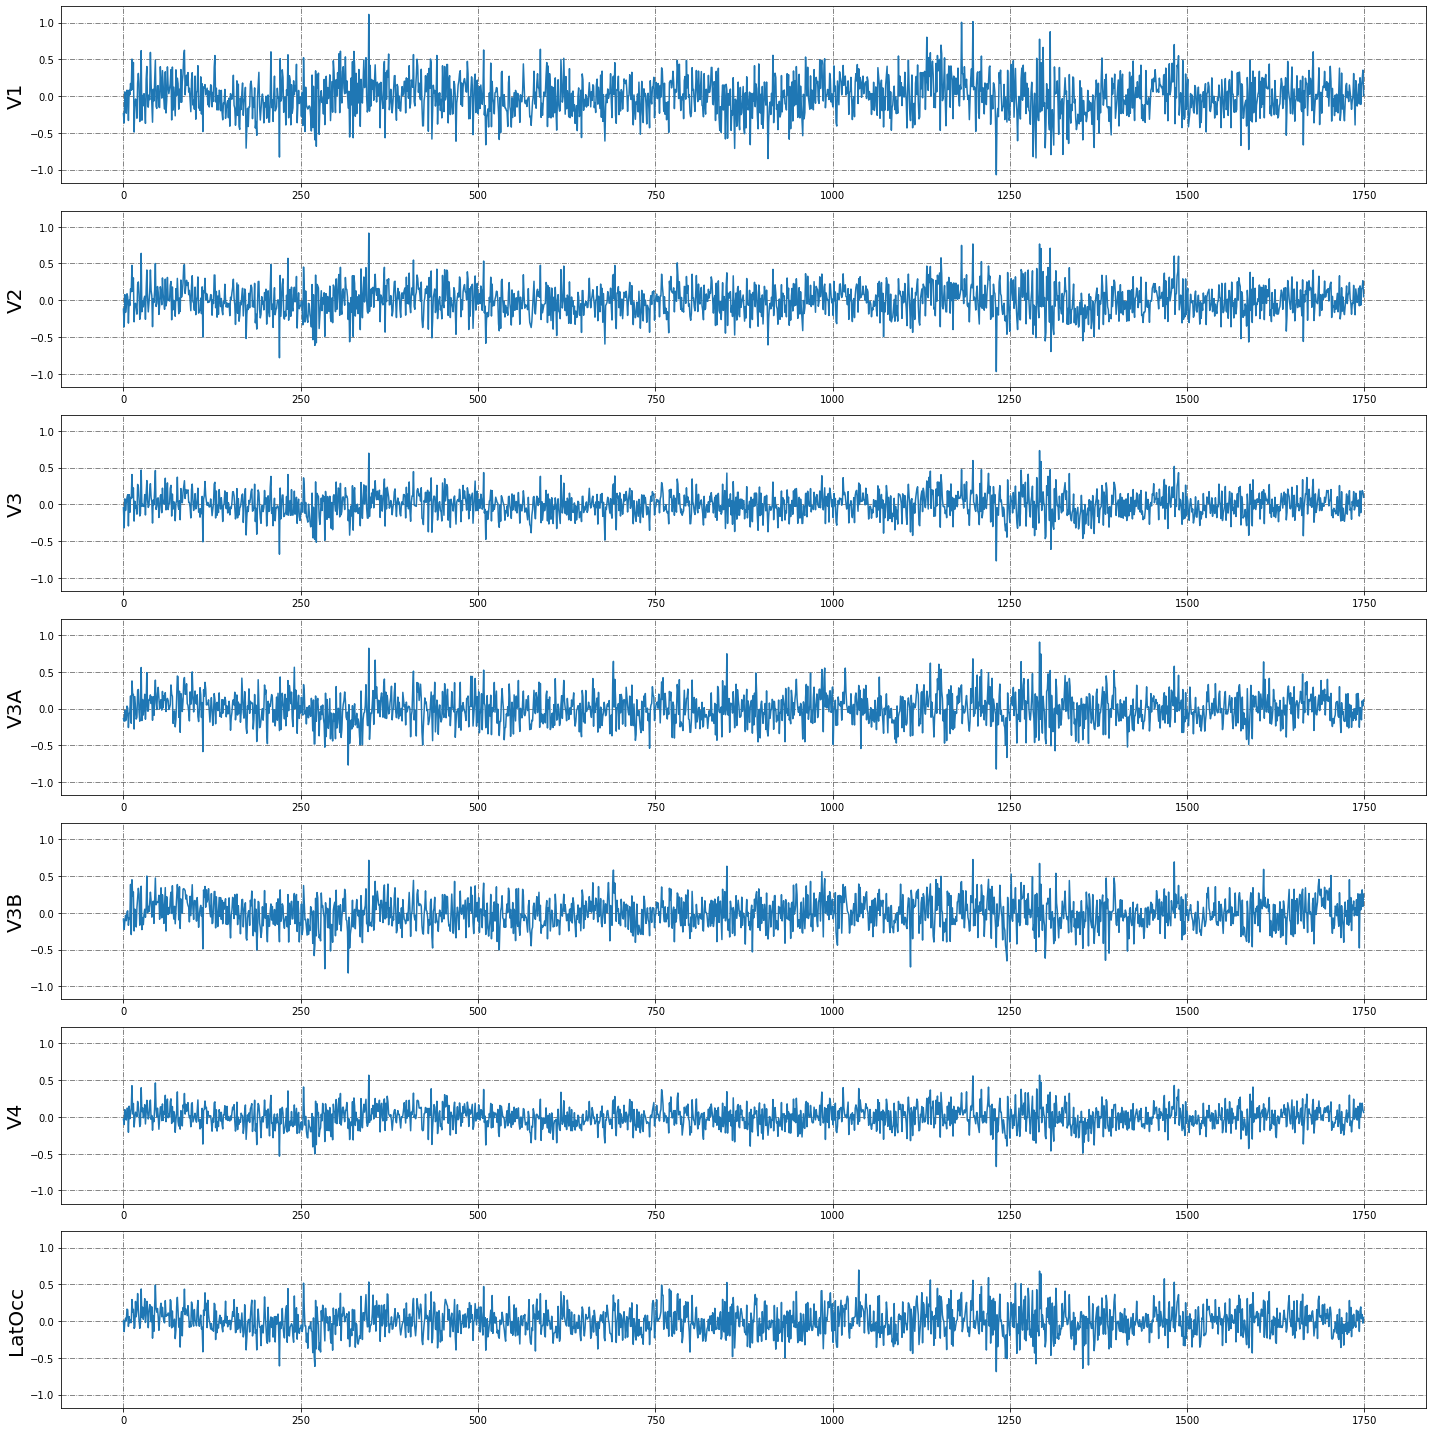

In [53]:
#plt.plot(responses_V1.mean(axis=1))
fig, axs = plt.subplots(nrows=7, ncols=1, sharey=True, figsize=(20,20),tight_layout=True)
for i in range(0,7):
    axs[i].set_ylabel(data["roi_names"][i+1], fontsize=20)
    axs[i].plot(responses.loc[:,i+1].mean(axis=1))
    axs[i].grid(True, color='dimgrey', linestyle='-.')

# Average response per ROI for relatively similar images

<h2 align="center">Monkey</h2> 

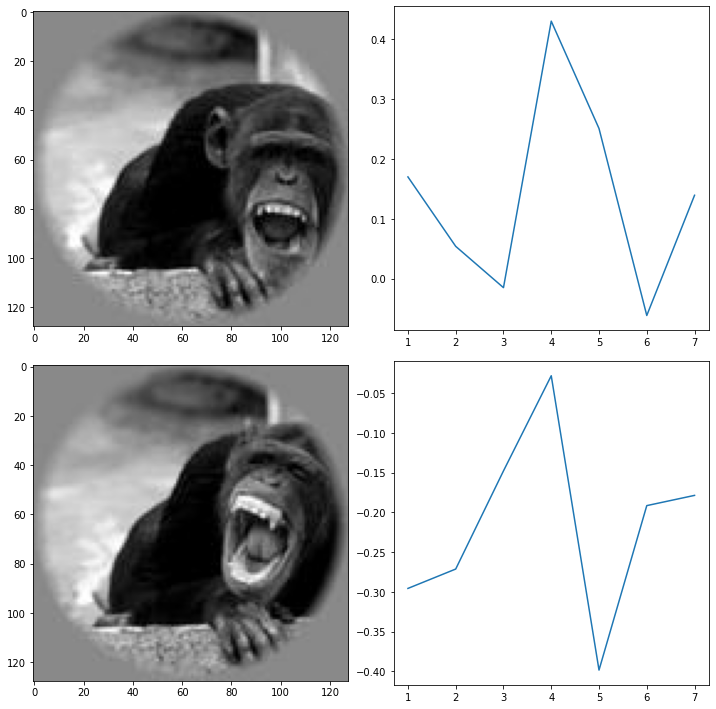

In [105]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10),tight_layout=True)
axs[0,0].imshow(plt.imread('images/stimuli/77.jpg'))
axs[0,1].plot(np.arange(1,8),[responses.loc[77,i].mean() for i in range(1,8)])
axs[1,0].imshow(plt.imread('images/stimuli/233.jpg'))
axs[1,1].plot(np.arange(1,8),[responses.loc[233,i].mean() for i in range(1,8)])

<h2 align="center">Zebra</h2> 

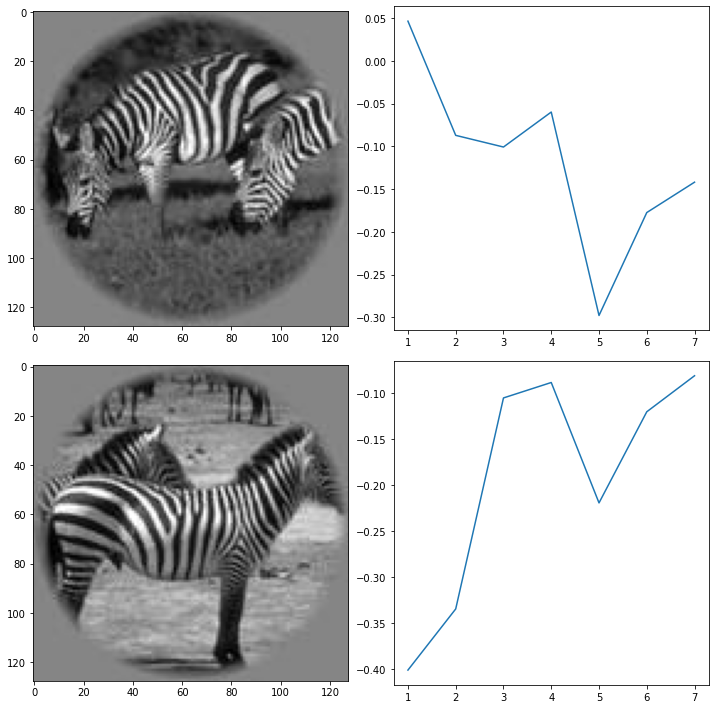

In [112]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10),tight_layout=True)
axs[0,0].imshow(plt.imread('images/stimuli/252.jpg'))
axs[0,1].plot(np.arange(1,8),[responses.loc[252,i].mean() for i in range(1,8)])
axs[1,0].imshow(plt.imread('images/stimuli/253.jpg'))
axs[1,1].plot(np.arange(1,8),[responses.loc[253,i].mean() for i in range(1,8)])

<h2 align="center">Female</h2> 

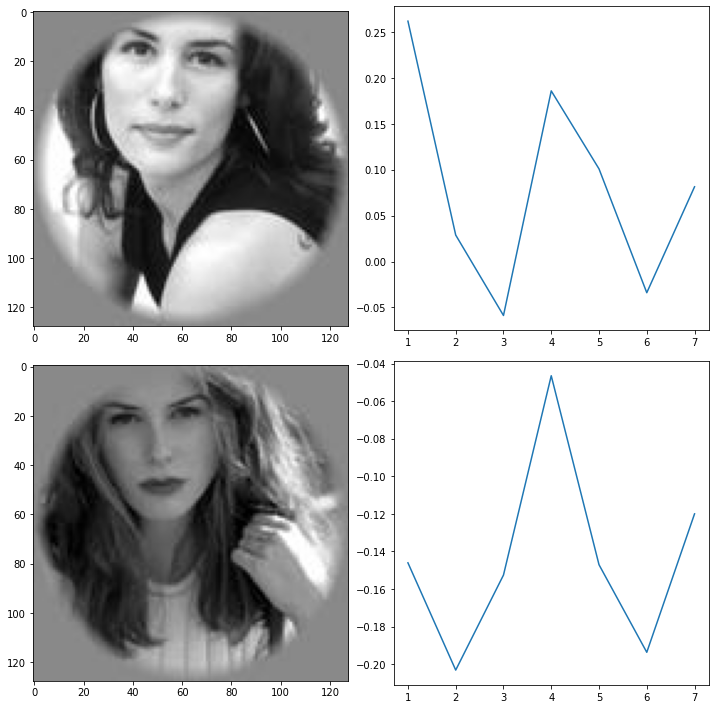

In [115]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10),tight_layout=True)
axs[0,0].imshow(plt.imread('images/stimuli/109.jpg'))
axs[0,1].plot(np.arange(1,8),[responses.loc[109,i].mean() for i in range(1,8)])
axs[1,0].imshow(plt.imread('images/stimuli/125.jpg'))
axs[1,1].plot(np.arange(1,8),[responses.loc[125,i].mean() for i in range(1,8)])

<h2 align="center">Nature</h2> 

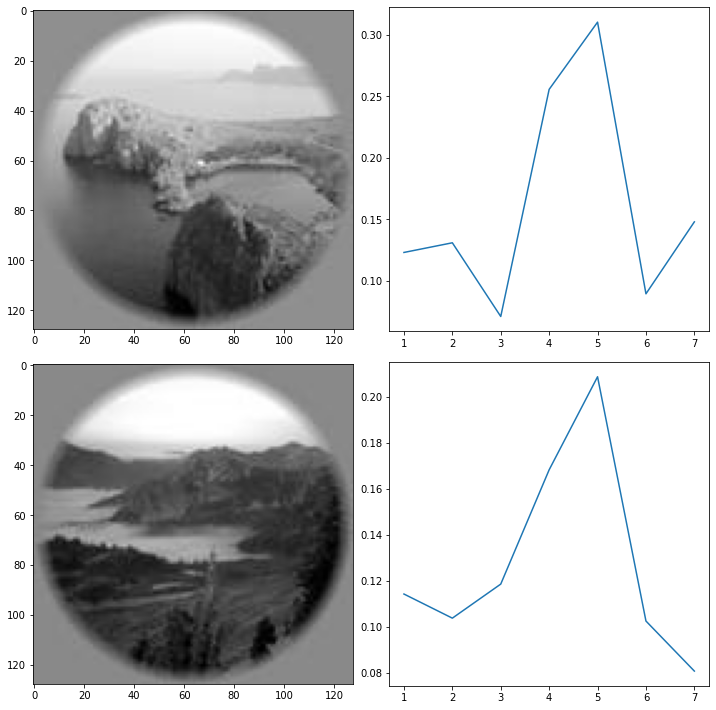

In [116]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10),tight_layout=True)
axs[0,0].imshow(plt.imread('images/stimuli/113.jpg'))
axs[0,1].plot(np.arange(1,8),[responses.loc[113,i].mean() for i in range(1,8)])
axs[1,0].imshow(plt.imread('images/stimuli/114.jpg'))
axs[1,1].plot(np.arange(1,8),[responses.loc[114,i].mean() for i in range(1,8)])

# Clustering the fMRI responses

### Kmeans (assumes a gaussian structure (bad) but keeps dimensional info (good))

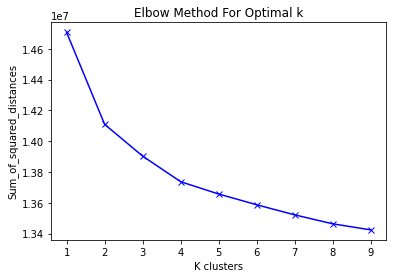

In [47]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(responses)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()